In [215]:
import pickle
import numpy as np
from numpy import linalg as LA
from cossim import build_cossim
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import re

In [216]:
lyrics = pickle.load(open("broadway_lyrics_v5.pkl", "rb"))

In [217]:
lyrics.keys()

dict_keys(['Babes In Arms', 'Matilda', '70, Girls, 70', 'Hamilton', "Finian's Rainbow", 'High Society', 'American Idiot', 'Sunset Boulevard', 'Jekyll & Hyde', 'High School Musical On Stage', "Li'l Abner", 'Hedwig And The Angry Inch', 'Bring It On', 'So Long, 174th Street', 'Little Mary Sunshine', 'Scrooge', 'Jacques Brel Is Alive and Well and Living in Paris', 'See What I Wanna See', 'Nice Work If You Can Get It', 'Drowsy Chaperone, The', 'Seven Brides For Seven Brothers', 'Boy Friend, The', 'Across the Universe', 'Make Me A Song', 'Spamalot', 'Wizard Of Oz, The', 'Evita', 'Bronx Tale', 'In the Heights', 'Take Flight', 'Bajour', 'Title Of Show', 'I Sing', 'I Love You Because', 'Milk And Honey', 'Can-Can', 'Anna Karenina', 'How the Grinch Stole Christmas', 'Pajama Game, The', 'Frankenstein: A New Musical', 'Gone Missing', 'Jane Eyre', 'Urinetown', 'Colma', 'We Will Rock You', 'Bullets Over Broadway', 'Starlight Express', '42nd Street', 'Priscilla: Queen of the Desert', 'Bright Lights, B

In [218]:
lyrics["Mamma Mia!"]

{'composer': 'Benny Andersson and Bjorn Ulvaeus.',
 'currently_playing': False,
 'description': "ABBA's songs were so popular that the idea of creating a musical based on them was resting on the surface. But it came to mind only to Judy Kreimer. Thanks to the efforts of the discerning producer, the musical “Mamma Mia” was born. Known tunes included in the golden fund of world music collection. Using them for staging illustrations was a great idea. No matter in whose performance sounded songs of the legendary band – they continued to be provocative and inflaming. Lyrics of Swedish composers in the performance perfectly complement its storyline. They contain simple aspirations of ordinary people. It is due to this compositions, the histrionics became close to almost all the spectators. Experiences of Sophie and Donna perfectly transferred in songs, performed by women at different points in their lives. Wonderfully arranged dance numbers enable the public to immerse themselves in the hist

In [219]:
# get TF-IDF of lyrics

d = {}
for show in lyrics:
    S = ""
    for line in lyrics[show]["lyrics"]:
        S += " " + line
    d[show] = S
    
tfidf_vec = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
doc_by_vocab = tfidf_vec.fit_transform([d[i] for i in d]).toarray()
index_to_vocab = {i:v for i, v in enumerate(tfidf_vec.get_feature_names())}

In [220]:
musical_name_to_index = {musical:index for index, musical in enumerate(lyrics.keys())}

In [221]:
doc_by_vocab[214]

array([0., 0., 0., ..., 0., 0., 0.])

In [222]:
musical_name_to_index["Mamma Mia!"]

398

In [223]:
normboy = np.apply_along_axis(LA.norm,1,doc_by_vocab)

In [224]:
musical_index_to_name = {value:key for key,value in musical_name_to_index.items()}

In [225]:
cosmat = build_cossim(doc_by_vocab)

C:\Users\AChatt10\OneDrive\Arjun\School\2018-19 (Sem2)\CS 4300\cs4300sp2019-jp2254-nmd65-bdg74-ac2582-srm276\cossim.py:17: RuntimeWarning: invalid value encountered in true_divide
  intermediate = np.divide(dot,norms)
C:\Users\AChatt10\OneDrive\Arjun\School\2018-19 (Sem2)\CS 4300\cs4300sp2019-jp2254-nmd65-bdg74-ac2582-srm276\cossim.py:18: RuntimeWarning: invalid value encountered in true_divide
  sim_mat = np.divide(np.transpose(intermediate),norms)


In [226]:
np.sum(np.isnan(cosmat),axis=1)

array([ 40,  40,  40,  40, 472,  40,  40,  40,  40,  40,  40,  40,  40,
       472, 472,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40, 472,  40,  40,  40,  40,  40, 472,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40, 472,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40, 472,  40,  40, 472,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40, 472,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
       472,  40,  40,  40,  40,  40,  40,  40, 472,  40,  40,  40, 472,
        40,  40,  40, 472,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40, 472,  40,  40, 472,  40, 472,  40,  40,
        40,  40,  40,  40, 472,  40,  40, 472,  40,  40,  40,  40, 472,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  4

In [227]:
musical_index_to_name

{0: 'Babes In Arms',
 1: 'Matilda',
 2: '70, Girls, 70',
 3: 'Hamilton',
 4: "Finian's Rainbow",
 5: 'High Society',
 6: 'American Idiot',
 7: 'Sunset Boulevard',
 8: 'Jekyll & Hyde',
 9: 'High School Musical On Stage',
 10: "Li'l Abner",
 11: 'Hedwig And The Angry Inch',
 12: 'Bring It On',
 13: 'So Long, 174th Street',
 14: 'Little Mary Sunshine',
 15: 'Scrooge',
 16: 'Jacques Brel Is Alive and Well and Living in Paris',
 17: 'See What I Wanna See',
 18: 'Nice Work If You Can Get It',
 19: 'Drowsy Chaperone, The',
 20: 'Seven Brides For Seven Brothers',
 21: 'Boy Friend, The',
 22: 'Across the Universe',
 23: 'Make Me A Song',
 24: 'Spamalot',
 25: 'Wizard Of Oz, The',
 26: 'Evita',
 27: 'Bronx Tale',
 28: 'In the Heights',
 29: 'Take Flight',
 30: 'Bajour',
 31: 'Title Of Show',
 32: 'I Sing',
 33: 'I Love You Because',
 34: 'Milk And Honey',
 35: 'Can-Can',
 36: 'Anna Karenina',
 37: 'How the Grinch Stole Christmas',
 38: 'Pajama Game, The',
 39: 'Frankenstein: A New Musical',
 40:

In [228]:
cosmat

array([[1.        , 0.07493888, 0.05042655, ..., 0.0615813 , 0.06327257,
        0.05451262],
       [0.07493888, 1.        , 0.05810486, ..., 0.04533972, 0.07160934,
        0.0756633 ],
       [0.05042655, 0.05810486, 1.        , ..., 0.03842763, 0.0506819 ,
        0.05180908],
       ...,
       [0.0615813 , 0.04533972, 0.03842763, ..., 1.        , 0.04669384,
        0.04049304],
       [0.06327257, 0.07160934, 0.0506819 , ..., 0.04669384, 1.        ,
        0.07559427],
       [0.05451262, 0.0756633 , 0.05180908, ..., 0.04049304, 0.07559427,
        1.        ]])

In [229]:
def get_sim(mus_1, mus_2, sim_mat = cosmat, name_to_index = musical_name_to_index):
    ind_1 = name_to_index[mus_1]
    ind_2 = name_to_index[mus_2]
    score = sim_mat[ind_1,ind_2]
    return score

In [230]:
def rank_mus(musical,matrix):
    mus_idx = musical_name_to_index[musical]
    score_list = matrix[mus_idx]
    sorted_i = np.argsort(score_list)[::-1]
    mus_score_list = [(musical_index_to_name[i],score) for i,score in enumerate(score_list)]
#     mus_score_list_sorted = sorted(mus_score_list,key=lambda i: -i[1])
#     print(score_list)
    return np.array(mus_score_list)[sorted_i]

In [231]:
rank_mus("Mamma Mia!",cosmat)

array([['Burn The Floor', 'nan'],
       ['Take Flight', 'nan'],
       ['Fosse', 'nan'],
       ['Lennon', 'nan'],
       ['Pump Boys And Dinettes', 'nan'],
       ['Andrew Lloyd Webber Divas', 'nan'],
       ["Bring In 'Da Noise, Bring In 'Da Funk", 'nan'],
       ['Five Course Love', 'nan'],
       ['Do Black Patent Leather Shoes Really Reflect Up?', 'nan'],
       ['First Date', 'nan'],
       ["Summer of '42", 'nan'],
       ['110 in the Shade', 'nan'],
       ['Redhead', 'nan'],
       ["Singin' In The Rain", 'nan'],
       ['Side Show', 'nan'],
       ['Producers', 'nan'],
       ['Can-Can', 'nan'],
       ['42nd Street', 'nan'],
       ['Mr. Mark Twain', 'nan'],
       ["Jelly's Last Jam", 'nan'],
       ['Gentlemen Prefer Blondes', 'nan'],
       ['Addams Family, The', 'nan'],
       ['Of Thee I Sing', 'nan'],
       ['How to Succeed in Business Without Really Trying', 'nan'],
       ["Kitty's Kisses", 'nan'],
       ['Yank!', 'nan'],
       ['On Your Feet!', 'nan'],
       ['

In [232]:
# composer stuff
for i in lyrics:
    print(lyrics[i]["composer"])

Richard Rodgers.
Tim Minchin
John Kander

Burton Lane
Cole Porter
Green Day
Andrew Lloyd Webber
Frank Wildhorn
Matthew Gerrard, Robbie Nevil, Ray Cham, Greg Cham, Drew Seeley, Randy Petersen, Kevin Quinn, Andy Dodd, Adam Watts, Bryan Louiselle, David N. Lawrence, Faye Greenberg, Jamie Houston
Gene De Paul
Stephen Trask
Amanda Green and Lin-Manuel Miranda
Stan Daniels

Leslie Bricusse
Jacques Brel

George Gershwin
Lisa Lambert & Greg Morrison.
Gene DePaul
Sandy Wilson.
the Beatles
William Finn
John Du Prez, Eric Idle and Neil Innes
Harold Arlen and Herbert Stothart
Andrew Lloyd Webber
Alan Menken
Lin-Manuel Miranda.
David Shire
Walter Marks.
Jeff Bowen

Joshua Salzman.
Jerry Herman
Cole Porter
Daniel Levine
Mel Marvin, Albert Hague
Richard Adler and Jerry Ross
Mark Baron
Michael Friedman
Paul Gordon
Mark Hollmann
H.P. Mendoza
Queen
Various
Andrew Lloyd Webber
Harry Warren
Various

Adam Guettel
Alan Menken.
Cy Coleman.
Music and Lyrics Stephen Sondheim

Jimmy Roberts
Andrew Lloyd Webber


In [233]:
compM = np.zeros([len(lyrics),len(lyrics)])
for mus1 in musical_name_to_index:
    i = musical_name_to_index[mus1]
    comp1 = lyrics[mus1]["composer"]
    if len(comp1) > 0:
        comp1_nop = re.sub(r'[^\w ,]','',comp1)
        for mus2 in musical_name_to_index:
            j = musical_name_to_index[mus2]
            comp2 = lyrics[mus2]["composer"]
            if len(comp2) > 0:
                comp2_nop = re.sub(r'[^\w ,]','',comp2)
                compM[i,j] = (comp1_nop in comp2_nop) or (comp2_nop in comp1_nop)

In [234]:
for i in range(len(compM)):
    print(sum(compM[i,:]))

12.0
2.0
9.0
0.0
2.0
6.0
1.0
15.0
6.0
1.0
1.0
1.0
2.0
1.0
0.0
2.0
1.0
0.0
4.0
1.0
1.0
1.0
1.0
6.0
1.0
1.0
15.0
9.0
2.0
4.0
1.0
1.0
0.0
1.0
7.0
6.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
7.0
15.0
1.0
7.0
0.0
3.0
9.0
8.0
14.0
0.0
2.0
15.0
3.0
2.0
1.0
7.0
2.0
3.0
1.0
1.0
14.0
0.0
2.0
15.0
2.0
1.0
3.0
15.0
1.0
9.0
0.0
1.0
0.0
1.0
0.0
12.0
1.0
2.0
8.0
1.0
12.0
5.0
0.0
1.0
0.0
3.0
3.0
8.0
7.0
1.0
10.0
0.0
1.0
8.0
4.0
5.0
0.0
2.0
1.0
12.0
2.0
1.0
2.0
10.0
1.0
0.0
8.0
0.0
0.0
0.0
1.0
1.0
0.0
6.0
1.0
0.0
1.0
1.0
12.0
6.0
4.0
0.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
15.0
0.0
1.0
1.0
0.0
15.0
4.0
1.0
4.0
15.0
1.0
1.0
0.0
10.0
4.0
8.0
0.0
0.0
2.0
4.0
4.0
2.0
1.0
10.0
1.0
3.0
3.0
1.0
1.0
0.0
6.0
4.0
4.0
1.0
6.0
1.0
2.0
2.0
5.0
4.0
9.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
8.0
0.0
5.0
0.0
3.0
1.0
1.0
15.0
1.0
14.0
1.0
1.0
9.0
2.0
0.0
0.0
2.0
9.0
4.0
3.0
4.0
1.0
4.0
1.0
8.0
6.0
1.0
15.0
1.0
1.0
12.0
3.0
9.0
1.0
9.0
1.0
1.0
1.0
0.0
1.0
1.0
8.0
2.0
1.0
1.0
14.0
4.0
2.0
9.0
7.0
3.0
1.0
1.0
0.0
5.0
4.0
12.0
1.0
0.0
9.0
1.

In [235]:
musical_name_to_index

{'110 in the Shade': 90,
 '13': 354,
 '1776': 328,
 '25th Annual Putnam County Spelling Bee': 410,
 '42nd Street': 47,
 '70, Girls, 70': 2,
 '9 to 5': 159,
 'A Day in Hollywood / A Night in the Ukraine': 288,
 'Ace': 258,
 'Across the Universe': 22,
 'Act, The': 467,
 'Addams Family, The': 160,
 'Adding Machine': 277,
 'Adrift In Macao': 453,
 'Adventures of Tom Sawyer, The': 128,
 'Aida': 444,
 "Ain't Misbehavin'": 407,
 "Ain't Too Proud": 191,
 'Aladdin': 231,
 "Alas! Alack! Zorro's Back!": 382,
 'All Shook Up': 353,
 'Allegro': 85,
 'Altar Boyz': 146,
 'American Idiot': 6,
 'American Mall': 446,
 'American in Paris, An': 389,
 'Anastasia': 111,
 'Andrew Lloyd Webber Divas': 400,
 'Anna Karenina': 36,
 'Annie': 100,
 'Annie Get Your Gun': 315,
 'Anyone Can Whistle': 325,
 'Anything Goes': 470,
 'Applause': 284,
 'Apple Tree, The': 334,
 'Ark, The': 445,
 'As Thousands Cheer': 269,
 'Aspects of Love': 190,
 'Assassins': 351,
 'Avenue Q': 305,
 'Babes In Arms': 0,
 'Baby': 154,
 'Bad G

In [236]:
# get TF-IDF of descriptions
    
tfidf_vec2 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
my_mat = tfidf_vec2.fit_transform([str(lyrics[m]["description"]) for m in lyrics]).transpose()
index_to_vocab2 = {i:v for i, v in enumerate(tfidf_vec2.get_feature_names())}

In [237]:
u, s, v_trans = svds(my_mat, k=100)

In [238]:
print(u.shape)
print(s.shape)
print(v_trans.shape)

(5169, 100)
(100,)
(100, 473)


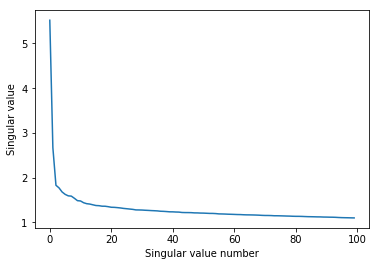

In [239]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

I dont think we need more than 20

In [240]:
words_compressed, _, docs_compressed = svds(my_mat, k=20)
docs_compressed = docs_compressed.transpose()

In [241]:
word_to_index = tfidf_vec2.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(5169, 20)


In [242]:
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [243]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [244]:
word_to_index.keys()

dict_keys(['elections', 'tendency', 'seats', 'highlighted', 'learns', 'agree', 'dedicated', 'compositions', 'grace', 'enjoyable', 'fans', 'participant', 'birth', 'cast', 'clarity', 'lives', 'fantastic', '50s', 'direction', 'engaged', 'exciting', 'toes', 'finding', 'lord', 'spite', 'tap', 'gather', 'invited', 'genuine', 'perceive', 'variations', 'going', 'desire', 'charismatic', 'distinctive', 'expectations', 'furor', 'achievements', 'intrigue', 'confirms', 'complexity', 'talented', 'runs', 'sense', 'village', 'selected', 'grand', 'street', 'problem', 'stupid', '1960s', 'moral', 'minute', 'ran', 'silly', 'surface', 'distant', 'visions', 'conquer', 'elvis', 'said', 'storylines', 'serial', 'lily', 'older', 'evil', '2012', 'lesser', '2008', 'aid', 'necessary', 'nationalities', 'broadcasts', 'weren', 'survived', 'acted', 'understanding', 'fewer', 'coupled', 'israel', 'flows', 'fosse', 'lets', 'didn', 'internet', 'affection', 'secular', 'enhanced', 'phantasmagoric', 'maintain', 'seconds', 'i

In [245]:
closest_words("witty")

[('faces', 0.7301512200272925),
 ('charming', 0.6919905260693509),
 ('gentlemen', 0.6792358889751721),
 ('simplicity', 0.6542169586494383),
 ('ill', 0.6459522264568243),
 ('bored', 0.6406719428974103),
 ('ran', 0.6374284585606608),
 ('getting', 0.6349879121652394),
 ('nicholaw', 0.6179315991688652),
 ('gains', 0.60411999847541)]

In [246]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [247]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
# subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)

(473, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 473 samples in 0.004s...
[t-SNE] Computed neighbors for 473 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 473 / 473
[t-SNE] Mean sigma: 0.077129
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.347923
[t-SNE] KL divergence after 1000 iterations: 1.171217
(473, 2)


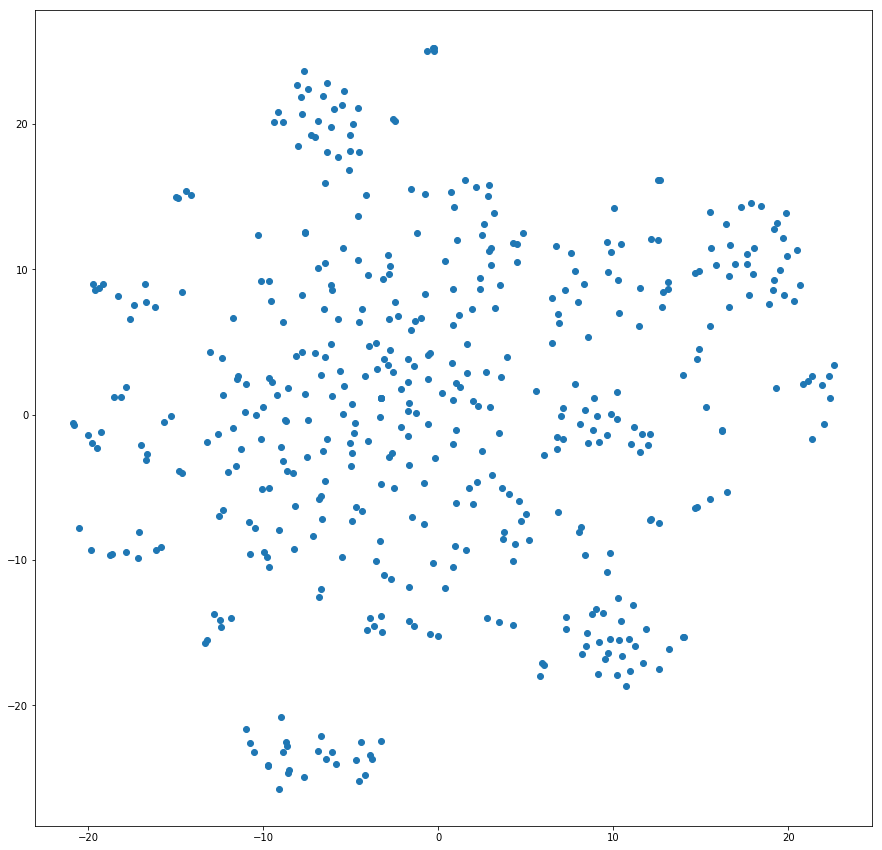

In [248]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [249]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(lyrics.keys())[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [250]:
for i in range(10):
    print(list(lyrics.keys())[i])
    for title, score in closest_projects(i):
        print("{}:{:.3f}".format(title[:40], score))
    print()

Babes In Arms
Ernest in Love:0.744
Greetings From Yorkville:0.736
La Cage Aux Folles:0.723
Baker's Wife, The:0.687
Barnum:0.686

Matilda
Mary Poppins:0.833
In Trousers:0.798
In the Heights:0.774
Most Happy Fella, The:0.762
Honk:0.741

70, Girls, 70
Flora The Red Menace:0.771
Walmartopia:0.742
Wildcat:0.723
Rink, The:0.705
Act, The:0.676

Hamilton
Copacabana:0.653
Wild Party:0.645
Very Good Eddie:0.643
Wonderful Town:0.623
Face the Music:0.573

Finian's Rainbow
Brigadoon:0.744
Cinderella: Songs from the Classic Fairy:0.691
Into the Woods:0.672
Jungle Book:0.663
Princess and the Frog:0.609

High Society
Gentlemen Prefer Blondes:0.739
Gay Divorce, The:0.700
Goodbye Girl, The:0.694
I Love You Because:0.690
Gigi:0.686

American Idiot
Bare: A Pop Opera:0.726
Camelot:0.705
Best Little Whorehouse in Texas, The:0.695
Bring It On:0.692
Heathers:0.647

Sunset Boulevard
Little Night Music:0.687
Star Is Born, A:0.653
No Strings:0.621
Sunday in the Park With George:0.584
Summer Stock:0.581

Jekyll &

In [251]:
CP = np.zeros([len(lyrics),len(lyrics)])
for i in range(len(lyrics)):
    for title, score in closest_projects(i,len(lyrics)):
        index = musical_name_to_index[title]
        CP[index,i] = score
np.fill_diagonal(CP,1)

In [252]:
CP

array([[ 1.        ,  0.24309053,  0.08831035, ...,  0.23339997,
        -0.10627052,  0.24892506],
       [ 0.24309053,  1.        , -0.09891744, ..., -0.24432667,
         0.02435251,  0.09716671],
       [ 0.08831035, -0.09891744,  1.        , ..., -0.10774948,
         0.21245625,  0.13174341],
       ...,
       [ 0.23339997, -0.24432667, -0.10774948, ...,  1.        ,
        -0.11292814,  0.14731977],
       [-0.10627052,  0.02435251,  0.21245625, ..., -0.11292814,
         1.        ,  0.40493298],
       [ 0.24892506,  0.09716671,  0.13174341, ...,  0.14731977,
         0.40493298,  1.        ]])

In [253]:
CP[3,4]

0.006073016280537441

In [259]:
tfidf_vec3 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 10, norm = "l2")
my_mat2 = tfidf_vec.fit_transform([d[i] for i in d]).transpose()

In [275]:
u, s, v_trans = svds(my_mat2, k=100)

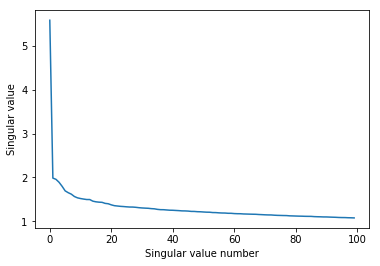

In [276]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [277]:
words_compressed, _, docs_compressed = svds(my_mat, k=20)
docs_compressed = docs_compressed.transpose()

In [278]:
word_to_index = tfidf_vec2.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(5169, 20)


In [279]:
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [280]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [281]:
word_to_index.keys()

dict_keys(['elections', 'tendency', 'seats', 'highlighted', 'learns', 'agree', 'dedicated', 'compositions', 'grace', 'enjoyable', 'fans', 'participant', 'birth', 'cast', 'clarity', 'lives', 'fantastic', '50s', 'direction', 'engaged', 'exciting', 'toes', 'finding', 'lord', 'spite', 'tap', 'gather', 'invited', 'genuine', 'perceive', 'variations', 'going', 'desire', 'charismatic', 'distinctive', 'expectations', 'furor', 'achievements', 'intrigue', 'confirms', 'complexity', 'talented', 'runs', 'sense', 'village', 'selected', 'grand', 'street', 'problem', 'stupid', '1960s', 'moral', 'minute', 'ran', 'silly', 'surface', 'distant', 'visions', 'conquer', 'elvis', 'said', 'storylines', 'serial', 'lily', 'older', 'evil', '2012', 'lesser', '2008', 'aid', 'necessary', 'nationalities', 'broadcasts', 'weren', 'survived', 'acted', 'understanding', 'fewer', 'coupled', 'israel', 'flows', 'fosse', 'lets', 'didn', 'internet', 'affection', 'secular', 'enhanced', 'phantasmagoric', 'maintain', 'seconds', 'i

In [282]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [283]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
# subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)

(473, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 473 samples in 0.004s...
[t-SNE] Computed neighbors for 473 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 473 / 473
[t-SNE] Mean sigma: 0.077129
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.158134
[t-SNE] KL divergence after 1000 iterations: 1.165874
(473, 2)


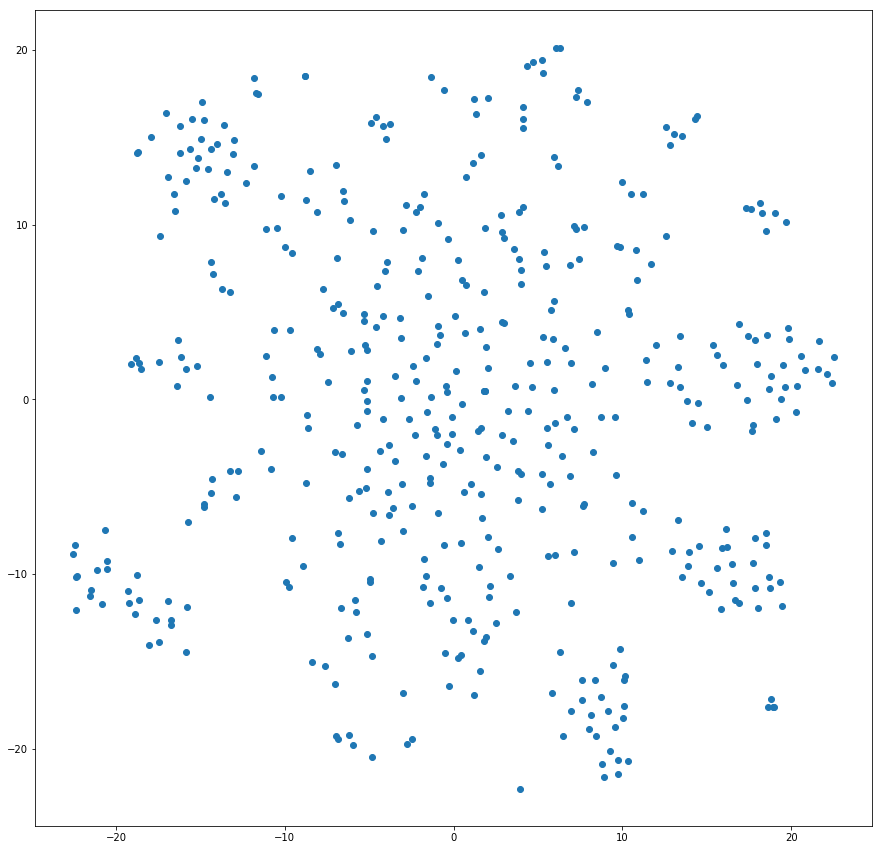

In [284]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [285]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(lyrics.keys())[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [286]:
for i in range(10):
    print(list(lyrics.keys())[i])
    for title, score in closest_projects(i):
        print("{}:{:.3f}".format(title[:40], score))
    print()

Babes In Arms
Ernest in Love:0.744
Greetings From Yorkville:0.736
La Cage Aux Folles:0.723
Baker's Wife, The:0.687
Barnum:0.686

Matilda
Mary Poppins:0.833
In Trousers:0.798
In the Heights:0.774
Most Happy Fella, The:0.762
Honk:0.741

70, Girls, 70
Flora The Red Menace:0.771
Walmartopia:0.742
Wildcat:0.723
Rink, The:0.705
Act, The:0.676

Hamilton
Copacabana:0.653
Wild Party:0.645
Very Good Eddie:0.643
Wonderful Town:0.623
Face the Music:0.573

Finian's Rainbow
Brigadoon:0.744
Cinderella: Songs from the Classic Fairy:0.691
Into the Woods:0.672
Jungle Book:0.663
Princess and the Frog:0.609

High Society
Gentlemen Prefer Blondes:0.739
Gay Divorce, The:0.700
Goodbye Girl, The:0.694
I Love You Because:0.690
Gigi:0.686

American Idiot
Bare: A Pop Opera:0.726
Camelot:0.705
Best Little Whorehouse in Texas, The:0.695
Bring It On:0.692
Heathers:0.647

Sunset Boulevard
Little Night Music:0.687
Star Is Born, A:0.653
No Strings:0.621
Sunday in the Park With George:0.584
Summer Stock:0.581

Jekyll &

In [287]:
CP2 = np.zeros([len(lyrics),len(lyrics)])
for i in range(len(lyrics)):
    for title, score in closest_projects(i,len(lyrics)):
        index = musical_name_to_index[title]
        CP2[index,i] = score
np.fill_diagonal(CP2,1)

In [291]:
CP2

array([[ 1.        ,  0.24309053,  0.08831035, ...,  0.23339997,
        -0.10627052,  0.24892506],
       [ 0.24309053,  1.        , -0.09891744, ..., -0.24432667,
         0.02435251,  0.09716671],
       [ 0.08831035, -0.09891744,  1.        , ..., -0.10774948,
         0.21245625,  0.13174341],
       ...,
       [ 0.23339997, -0.24432667, -0.10774948, ...,  1.        ,
        -0.11292814,  0.14731977],
       [-0.10627052,  0.02435251,  0.21245625, ..., -0.11292814,
         1.        ,  0.40493298],
       [ 0.24892506,  0.09716671,  0.13174341, ...,  0.14731977,
         0.40493298,  1.        ]])

In [191]:
cosmat[np.isnan(cosmat)] = 0

In [192]:
np.savetxt("sim_matrix.csv",cosmat,delimiter=",") #saving the similarity matrix

In [193]:
import json
json1 = json.dumps(musical_name_to_index) #saving name to index dictionary
f = open("name_to_index.json","w")
f.write(json1)
f.close()
json2 = json.dumps(musical_index_to_name) #saving index to name dictionary
f = open("index_to_name.json","w")
f.write(json2)
f.close()

In [194]:
np.savetxt("composer_sim.csv",compM,delimiter=",") #saving the composer similarity

In [195]:
np.savetxt("SVM_sim.csv",CP,delimiter=",") #saving the similarity from the SVM stuff